## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('drive/MyDrive/BigMart/Train_preprocessed3.csv')
df.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14
0,0,FDA15,9.30,0.016047,249.8092,8.225808,14,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,DRC01,5.92,0.019278,48.2692,6.096776,4,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,FDN15,17.50,0.016760,141.6180,7.648868,14,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,FDX07,19.20,0.066132,182.0950,6.597664,15,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,NCD19,8.93,0.066132,53.8614,6.903451,26,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Outlet_Sales', 'Outlet_Years', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'New_Item_Type_0', 'New_Item_Type_1',
       'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5',
       'Outlet_6', 'Outlet_7', 'Outlet_8', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5',
       'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9',
       'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13',
       'Item_Type_14'],
      dtype='object')

In [7]:
df.shape

(8523, 41)

In [8]:
# statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,7.297863,15.168133,0.459697,0.187610,0.109351,0.327702,0.280183,0.326763,0.127068,0.654347,0.108882,0.093746,0.718644,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.076030,0.029450,0.012906,0.076147,0.080019,0.100434,0.144550,0.025109,0.061011,0.106770,0.049865,0.019829,0.007509,0.140795,0.052212
std,4.226124,0.048742,62.275067,1.015211,8.371760,0.498402,0.390423,0.312098,0.469403,0.449115,0.469057,0.333069,0.475609,0.311509,0.291493,0.449687,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.265061,0.169073,0.112877,0.265249,0.271338,0.300596,0.351667,0.156464,0.239365,0.308839,0.217679,0.139420,0.086334,0.347831,0.222467
min,4.555000,0.003575,31.290000,3.534854,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.033085,93.826500,6.727728,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.062517,143.012800,7.492945,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,0.094585,185.643700,8.039898,26.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,9.479448,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Identifier         8523 non-null   object 
 1   Item_Weight             8523 non-null   float64
 2   Item_Visibility         8523 non-null   float64
 3   Item_MRP                8523 non-null   float64
 4   Item_Outlet_Sales       8523 non-null   float64
 5   Outlet_Years            8523 non-null   int64  
 6   Item_Fat_Content_0      8523 non-null   int64  
 7   Item_Fat_Content_1      8523 non-null   int64  
 8   Outlet_Size_0           8523 non-null   int64  
 9   Outlet_Size_1           8523 non-null   int64  
 10  Outlet_Location_Type_0  8523 non-null   int64  
 11  Outlet_Location_Type_1  8523 non-null   int64  
 12  Outlet_Type_0           8523 non-null   int64  
 13  Outlet_Type_1           8523 non-null   int64  
 14  Outlet_Type_2           8523 non-null   

In [10]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier           1559
Item_Weight                417
Item_Visibility           7880
Item_MRP                  5938
Item_Outlet_Sales         3493
Outlet_Years                 9
Item_Fat_Content_0           2
Item_Fat_Content_1           2
Outlet_Size_0                2
Outlet_Size_1                2
Outlet_Location_Type_0       2
Outlet_Location_Type_1       2
Outlet_Type_0                2
Outlet_Type_1                2
Outlet_Type_2                2
New_Item_Type_0              2
New_Item_Type_1              2
Outlet_0                     2
Outlet_1                     2
Outlet_2                     2
Outlet_3                     2
Outlet_4                     2
Outlet_5                     2
Outlet_6                     2
Outlet_7                     2
Outlet_8                     2
Item_Type_0                  2
Item_Type_1                  2
Item_Type_2                  2
Item_Type_3                  2
Item_Type_4                  2
Item_Type_5                  2
Item_Typ

In [11]:
## 타겟변수 로그변환 해제
#df['Item_Outlet_Sales'] = np.expm1(df['Item_Outlet_Sales'])

## Preprocessing the dataset

In [12]:
X = df.drop(columns=['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [13]:
X.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'New_Item_Type_0', 'New_Item_Type_1', 'Outlet_0',
       'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6',
       'Outlet_7', 'Outlet_8', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2',
       'Item_Type_3', 'Item_Type_4', 'Item_Type_5', 'Item_Type_6',
       'Item_Type_7', 'Item_Type_8', 'Item_Type_9', 'Item_Type_10',
       'Item_Type_11', 'Item_Type_12', 'Item_Type_13', 'Item_Type_14'],
      dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler

cont_vars = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Years']
cat_vars = ['Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'New_Item_Type_0', 'New_Item_Type_1',
       'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5',
       'Outlet_6', 'Outlet_7', 'Outlet_8','Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5',
       'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9',
       'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13',
       'Item_Type_14']
scaler = StandardScaler()
df_cont = pd.DataFrame(scaler.fit_transform(X[cont_vars]), columns = cont_vars)
X_norm = pd.concat([df_cont, X[cat_vars]], axis=1)

X_norm.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14
0,-0.841872,-1.111358,1.747454,-0.139541,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,-1.641706,-1.045067,-1.489023,-1.334103,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.098554,-1.096733,0.010040,-0.139541,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.500838,-0.083740,0.660050,-0.020085,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-0.929428,-0.083740,-1.399220,1.293934,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [16]:
X_norm.shape

(8523, 39)

## Model Training

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("RMSE:", np.sqrt(mean_squared_error(y,pred)))
    print("CV Score:", cv_score)

Model Report
MSE: 0.28721190274159686
RMSE: 0.5359215453231908
CV Score: 0.2893772396643802


<Axes: title={'center': 'Model Coefficients'}>

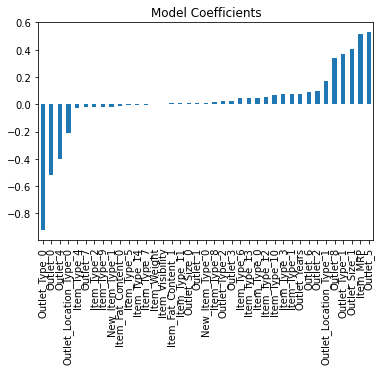

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, X_norm, y)
coef = pd.Series(model.coef_, X_norm.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.28721216382777787
RMSE: 0.5359217889093313
CV Score: 0.2893593745510109


<Axes: title={'center': 'Model Coefficients'}>

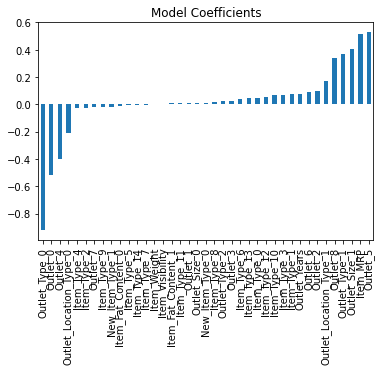

In [19]:
model = Ridge()
train(model, X_norm, y)
coef = pd.Series(model.coef_, X_norm.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 1.0305333080087593
RMSE: 1.015151864505385
CV Score: 1.030781898345697


<Axes: title={'center': 'Model Coefficients'}>

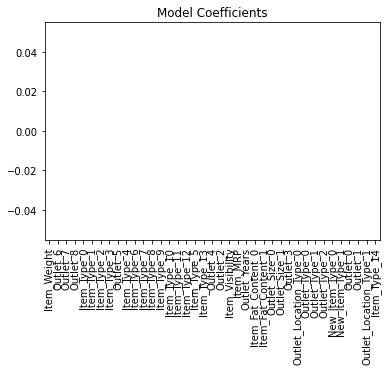

In [20]:
model = Lasso()
train(model, X_norm, y)
coef = pd.Series(model.coef_, X_norm.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 2.7767015319289398e-34
RMSE: 1.6663437616317167e-17
CV Score: 0.5690374819007761


<Axes: title={'center': 'Feature Importance'}>

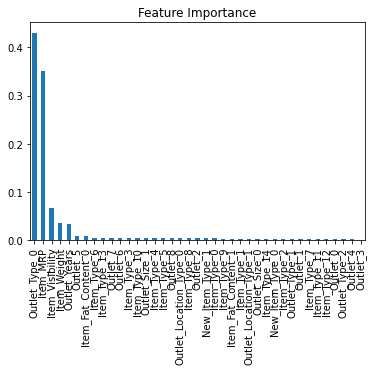

In [21]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X_norm, y)
coef = pd.Series(model.feature_importances_, X_norm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.041460983692356235
RMSE: 0.20361970359559076
CV Score: 0.30696861724941354


<Axes: title={'center': 'Feature Importance'}>

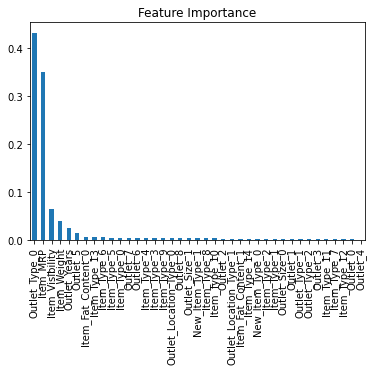

In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=70, n_estimators=200)
train(model, X_norm, y)
coef = pd.Series(model.feature_importances_, X_norm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [23]:
max_depths = []
for i in range(100):
  max_depth = model.estimators_[i].tree_.max_depth
  max_depths.append(max_depth)

print('Average : ', np.mean(max_depths))
print('Max : ', max(max_depths))

Average :  36.33
Max :  43


Model Report
MSE: 1.043898164227153e-28
RMSE: 1.0217133473862192e-14
CV Score: 0.3393804578989455


<Axes: title={'center': 'Feature Importance'}>

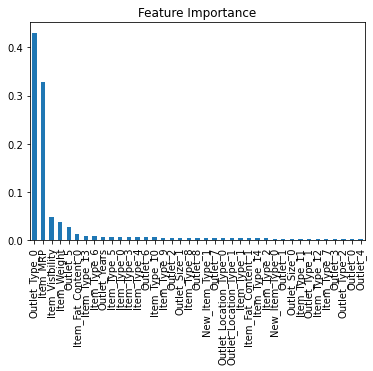

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X_norm, y)
coef = pd.Series(model.feature_importances_, X_norm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

# GridSearchCV - RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {
    'n_estimators':[100, 150, 200],
    #'rf_reg__max_features':['auto', 'sqrt', 'log2'],
    'max_depth':[40,50,60]
}

In [ ]:
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
# scoring=scoring

# Fit the grid search object to the data
grid_search.fit(X_norm, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [40, 50, 60],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
model_name = 'RandomForestRegressor'

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.162827,0.345324,0.054423,0.002723,40,100,"{'max_depth': 40, 'n_estimators': 100}",-0.314246,-0.309066,-0.302230,-0.315046,-0.298153,-0.307748,0.006629,7
1,6.747074,0.878720,0.103024,0.043788,40,150,"{'max_depth': 40, 'n_estimators': 150}",-0.313533,-0.310455,-0.300191,-0.314877,-0.295670,-0.306945,0.007634,3
2,8.296183,0.277091,0.101024,0.002432,40,200,"{'max_depth': 40, 'n_estimators': 200}",-0.311067,-0.311271,-0.301036,-0.314598,-0.296637,-0.306922,0.006862,2
3,4.164578,0.338613,0.052331,0.001936,50,100,"{'max_depth': 50, 'n_estimators': 100}",-0.315763,-0.312828,-0.303123,-0.314199,-0.297429,-0.308668,0.007146,9
4,6.115156,0.081383,0.085149,0.007019,50,150,"{'max_depth': 50, 'n_estimators': 150}",-0.314761,-0.311592,-0.298255,-0.314028,-0.296722,-0.307072,0.007910,4
5,8.349357,0.294774,0.103041,0.008672,50,200,"{'max_depth': 50, 'n_estimators': 200}",-0.313928,-0.312135,-0.299541,-0.311906,-0.297057,-0.306913,0.007112,1
6,3.987000,0.280125,0.052162,0.001004,60,100,"{'max_depth': 60, 'n_estimators': 100}",-0.316425,-0.313091,-0.301564,-0.313701,-0.296646,-0.308286,0.007737,8
7,6.223615,0.371359,0.078388,0.002158,60,150,"{'max_depth': 60, 'n_estimators': 150}",-0.314303,-0.312354,-0.300032,-0.313864,-0.297340,-0.307579,0.007339,6
8,8.144933,0.289278,0.109588,0.010663,60,200,"{'max_depth': 60, 'n_estimators': 200}",-0.314506,-0.311160,-0.302377,-0.312685,-0.296873,-0.307520,0.006761,5


In [ ]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_
print(best_estimator)

RandomForestRegressor(max_depth=50, n_estimators=200)
